In [1]:
#!pip install pdfplumber

In [3]:
import pandas as pd
import numpy as np
import pdfplumber
import os

In [ ]:
# This code will read the pdf files in the pdf folder and extract the text from them
# It will output three values: the year of the debate, the title/subject of the debate, and the text of the debate

# firstTime = True
for pdf in os.listdir("pdf"):
    print(pdf)
    pdf = pdfplumber.open("pdf/" + pdf)

    pdf_text = ""
    for page in pdf.pages:
        # Divide the page into two columns and ignoring the footer
        left_box = page.within_bbox((0, 0, page.width / 2, page.height - 100))
        left_text = left_box.extract_text()
        right_box = page.within_bbox((page.width / 2, 0, page.width, page.height - 100))
        right_text = right_box.extract_text()
        
        pdf_text += left_text + right_text
        
        # Clean the data
        pdf_text = pdf_text.replace("-\n", "")

    first_page = pdf.pages[0]
    year_box = first_page.within_bbox((first_page.width / 2, first_page.height - 100, first_page.width, first_page.height - 70))
    year_text = year_box.extract_text()

    # print(pdf_text)

    pdf_subject = pdf_text.split("\n")[1]

    # print(pdf_subject)
    pdf_text = pdf_text.strip().replace("\n", " ")
    pdf_text = pdf_text.replace(",", "")

    # # IF YOU WANT TO STORE THE DATA IN A CSV FILE
    # # Using a txt is necessary as some of the text goes over the character limit of csv
    # # Make sure to also uncomment the first line of this code, if you want to use this

    # file_name = "txt/" + pdf + ".txt"
    # with open(file_name, "w") as f:
    #     f.write(pdf_text)

    # pdf_df = pd.DataFrame({"date": [year_text], "subject": [pdf_subject], "text": [file_name]})

    # if firstTime:
    #     pdf_df.to_csv("debates.csv", index=False)
    #     firstTime = False
    # else:
    #     pdf_df.to_csv("debates.csv", mode='a', header=False, index=False)


0a8c1638-fb56-40c7-85ac-3947c9053398.pdf
0a9f7faa-4b9c-4c23-a078-0e28e9afaa04.pdf


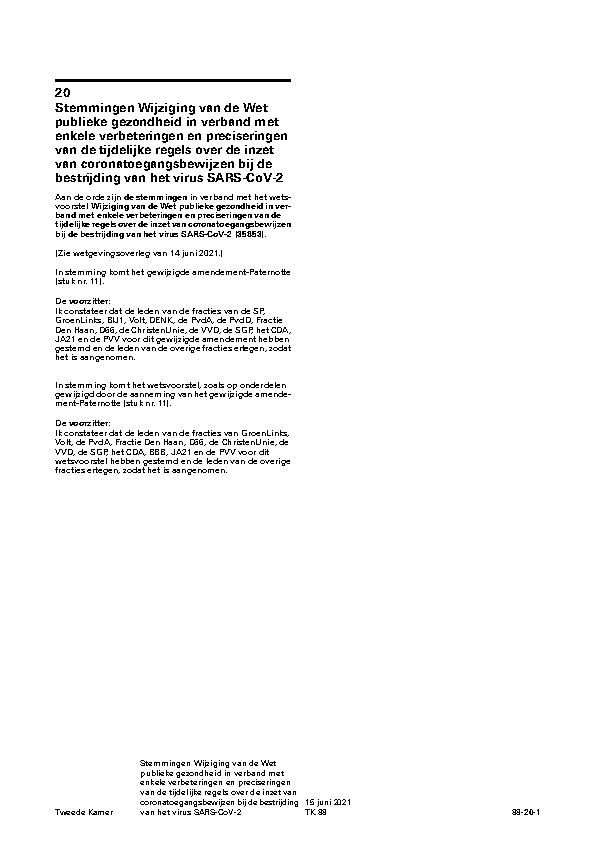

In [171]:
# This code shows how the box is drawn using the pdfplumber library

pdf = pdfplumber.open("pdf/9ebd3038-0edd-4e64-8eb1-fee26862de9f.pdf")
page = pdf.pages[0]

year_box = page.within_bbox((page.width-510, page.height - 800, page.width, page.height - 780))


im = page.to_image()
im.draw_rects(year_box.chars)


In [4]:
import os
import pdfplumber
import pandas as pd
from pdfminer.pdfparser import PDFSyntaxError

pdf_dir = "pdf"
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith(".pdf")]
total_files = len(pdf_files)

output_data = []

for idx, filename in enumerate(pdf_files, start=1):
    print(f"[{idx}/{total_files}] Processing: {filename}")
    pdf_path = os.path.join(pdf_dir, filename)

    try:
        with pdfplumber.open(pdf_path) as pdf:
            first_page = pdf.pages[0]
            year_box = first_page.within_bbox((
                first_page.width / 2,
                first_page.height - 100,
                first_page.width,
                first_page.height - 70
            ))

            year_text = year_box.extract_text().strip() if year_box.extract_text() else "Unknown"
    except Exception as e:
        print(f"⚠️  Skipping '{filename}' due to error: {e}")
        year_text = "Unreadable"

    output_data.append({"pdf_name": filename, "date": year_text})

# Save to CSV
df = pd.DataFrame(output_data)
df.to_csv("pdf_dates.csv", index=False)

print("✅ CSV with PDF names and dates created successfully.")


[1/24577] Processing: 12033f8a-508f-4204-ad71-895f1e3e910e.pdf
[2/24577] Processing: 7efb771f-ced4-4f88-84ce-ae6fcefca2ca.pdf
[3/24577] Processing: d397731b-ded8-4119-97e3-79597f004833.pdf
[4/24577] Processing: 426f0335-73a8-492d-8cdf-5a0520f50e86.pdf
[5/24577] Processing: 720e5470-1104-4be4-864d-a4f096d9359b.pdf
[6/24577] Processing: b3d5b486-6deb-44b1-b20a-b58148c992e2.pdf
[7/24577] Processing: 878cd9c9-d104-4fdb-8706-a0a75edd059c.pdf
[8/24577] Processing: 55d53b4b-3dd7-4e46-801b-7338b32c9262.pdf
[9/24577] Processing: 74159884-6f13-4554-a275-3a8b4178ee09.pdf
[10/24577] Processing: 92b240ce-b8ba-4b57-aa7a-5b5d4237a74c.pdf
[11/24577] Processing: 00d94655-7785-4e04-8a2d-46233905ed75.pdf
[12/24577] Processing: 6da19c1a-05b1-4610-ae8f-ef63f2b4d3fb.pdf
[13/24577] Processing: a3d517ee-610a-4c7d-b746-1196b53b731e.pdf
[14/24577] Processing: 2f195d2d-9a73-4e9c-be74-a4d2380d1d40.pdf
[15/24577] Processing: 0dbe2a41-62fb-4c88-8695-b6db0c3b27df.pdf
[16/24577] Processing: c7a16e11-9975-4675-825b-70

In [63]:
import os
import pdfplumber
import pandas as pd
from pdfminer.pdfparser import PDFSyntaxError

readcsv = pd.read_csv("pdf_dates.csv")

unknown = readcsv[readcsv["date"] == "Unknown"]

pdfs = unknown["pdf_name"].tolist()

pdf_dir = "pdf"
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith(".pdf") and f in pdfs]
total_files = len(pdf_files)

output_data = []

for idx, filename in enumerate(pdf_files, start=1):
    print(f"[{idx}/{total_files}] Processing: {filename}")
    pdf_path = os.path.join(pdf_dir, filename)

    try:
        with pdfplumber.open(pdf_path) as pdf:
            first_page = pdf.pages[0]
            year_box = first_page.within_bbox((page.width -295, page.height - 64, page.width, page.height -50))

            year_text = year_box.extract_text().strip() if year_box.extract_text() else "Unknown"
    except Exception as e:
        print(f"⚠️  Skipping '{filename}' due to error: {e}")
        year_text = "Unreadable"

    output_data.append({"pdf_name": filename, "date": year_text})

# Save to CSV
df = pd.DataFrame(output_data)
df.to_csv("pdf_dates_unknown.csv", index=False)

print("✅ CSV with PDF names and dates created successfully.")


[1/2092] Processing: d397731b-ded8-4119-97e3-79597f004833.pdf
[2/2092] Processing: 30615f13-e8e5-4446-8912-76adfaf0cde4.pdf
[3/2092] Processing: 069b0918-ed74-448b-87d5-5dc0daf171ed.pdf
[4/2092] Processing: a9219dfc-8f7f-4865-b2ae-731fcc963a7c.pdf
[5/2092] Processing: 408549bf-c2c9-48ba-9a74-e231c576f5b2.pdf
[6/2092] Processing: 572d66a2-f41f-42c9-9b69-a56eadeb6b08.pdf
[7/2092] Processing: 55eed551-2f87-4a21-96e7-eb1ad47d459f.pdf
[8/2092] Processing: c4700fef-3460-49e6-86fb-031cff2f4c08.pdf
[9/2092] Processing: aa4cc09c-d869-4908-8313-01924d356c2d.pdf
[10/2092] Processing: 0eab6bd9-1058-4a0d-a75c-9d6a326b6e1b.pdf
[11/2092] Processing: 740f1f5e-e68b-4a52-9701-7bce95428234.pdf
[12/2092] Processing: 026f2193-e8af-48d8-a230-12f447073330.pdf
[13/2092] Processing: 1d1d658d-7173-4fc5-9347-c48006d367de.pdf
[14/2092] Processing: cb82209a-53c5-41aa-930b-ef829b3e6733.pdf
[15/2092] Processing: 1e7b6916-3912-43a1-b95e-567069a890d2.pdf
[16/2092] Processing: 4ba97128-9c83-44dc-b9f2-d3a6d9d1b840.pdf
[

In [172]:
#if date in pdf_dates_unknown starts with a number, it's a date. add these to the pdf_dates.csv and remove that pdf_name entry (which was there before)from the pdf_dates.csv

import pandas as pd
import re
import os
import pdfplumber
from pdfminer.pdfparser import PDFSyntaxError
import numpy as np

readcsv = pd.read_csv("pdf_dates.csv")

unknowncsv = pd.read_csv("pdf_dates_unknown.csv")
knowncsv = unknowncsv[unknowncsv["date"].str.match(r'^\d.*')]

readcsv = pd.concat([readcsv, knowncsv], ignore_index=True)
readcsv = readcsv.drop_duplicates(subset=["pdf_name"], keep="last")

readcsv.to_csv("pdf_dates.csv", index=False)
print("✅ CSV with PDF names and dates created successfully.")

unknowncsv = unknowncsv[~unknowncsv["pdf_name"].isin(knowncsv["pdf_name"])]
unknowncsv.to_csv("pdf_dates_unknown.csv", index=False)
print("✅ CSV with PDF names and dates created successfully.")

✅ CSV with PDF names and dates created successfully.
✅ CSV with PDF names and dates created successfully.


In [88]:
import os
import pdfplumber
import pandas as pd
from pdfminer.pdfparser import PDFSyntaxError

readcsv = pd.read_csv("pdf_dates.csv")

unknown = readcsv[readcsv["date"] == "Unknown"]

pdfs = unknown["pdf_name"].tolist()

pdf_dir = "pdf"
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith(".pdf") and f in pdfs]
total_files = len(pdf_files)

output_data = []

for idx, filename in enumerate(pdf_files, start=1):
    print(f"[{idx}/{total_files}] Processing: {filename}")
    pdf_path = os.path.join(pdf_dir, filename)

    try:
        with pdfplumber.open(pdf_path) as pdf:
            first_page = pdf.pages[0]
            year_box = first_page.within_bbox((page.width -295, page.height - 74, page.width, page.height -55))

            year_text = year_box.extract_text().strip() if year_box.extract_text() else "Unknown"
    except Exception as e:
        print(f"⚠️  Skipping '{filename}' due to error: {e}")
        year_text = "Unreadable"

    output_data.append({"pdf_name": filename, "date": year_text})

# Save to CSV
df = pd.DataFrame(output_data)
df.to_csv("pdf_dates_unknown.csv", index=False)

print("✅ CSV with PDF names and dates created successfully.")


[1/1775] Processing: d397731b-ded8-4119-97e3-79597f004833.pdf
[2/1775] Processing: 30615f13-e8e5-4446-8912-76adfaf0cde4.pdf
[3/1775] Processing: 069b0918-ed74-448b-87d5-5dc0daf171ed.pdf
[4/1775] Processing: a9219dfc-8f7f-4865-b2ae-731fcc963a7c.pdf
[5/1775] Processing: 408549bf-c2c9-48ba-9a74-e231c576f5b2.pdf
[6/1775] Processing: 572d66a2-f41f-42c9-9b69-a56eadeb6b08.pdf
[7/1775] Processing: 55eed551-2f87-4a21-96e7-eb1ad47d459f.pdf
[8/1775] Processing: c4700fef-3460-49e6-86fb-031cff2f4c08.pdf
[9/1775] Processing: 0eab6bd9-1058-4a0d-a75c-9d6a326b6e1b.pdf
[10/1775] Processing: 740f1f5e-e68b-4a52-9701-7bce95428234.pdf
[11/1775] Processing: 026f2193-e8af-48d8-a230-12f447073330.pdf
[12/1775] Processing: 1d1d658d-7173-4fc5-9347-c48006d367de.pdf
[13/1775] Processing: 1e7b6916-3912-43a1-b95e-567069a890d2.pdf
[14/1775] Processing: 4ba97128-9c83-44dc-b9f2-d3a6d9d1b840.pdf
[15/1775] Processing: 2f1ca77e-6cd2-4854-a709-3c7d57c35e17.pdf
[16/1775] Processing: 4b1b3bc3-13d6-48f3-ac65-d9eff18529b1.pdf
[

In [ ]:
within_bbox((page.width -295, page.height - 74, page.width, page.height -40))



NameError: name 'within_bbox' is not defined

In [96]:
import os
import pdfplumber
import pandas as pd
from pdfminer.pdfparser import PDFSyntaxError

readcsv = pd.read_csv("pdf_dates_unknown.csv")

unknown = readcsv[readcsv["date"] == "Unknown"]

pdfs = unknown["pdf_name"].tolist()

pdf_dir = "pdf"
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith(".pdf") and f in pdfs]
total_files = len(pdf_files)

output_data = []

for idx, filename in enumerate(pdf_files, start=1):
    print(f"[{idx}/{total_files}] Processing: {filename}")
    pdf_path = os.path.join(pdf_dir, filename)

    try:
        with pdfplumber.open(pdf_path) as pdf:
            first_page = pdf.pages[0]
            year_box = first_page.within_bbox((page.width -295, page.height - 74, page.width, page.height -40))

            year_text = year_box.extract_text().strip() if year_box.extract_text() else "Unknown"
    except Exception as e:
        print(f"⚠️  Skipping '{filename}' due to error: {e}")
        year_text = "Unreadable"

    output_data.append({"pdf_name": filename, "date": year_text})

# Save to CSV
df = pd.DataFrame(output_data)
df.to_csv("pdf_dates_unknown.csv", index=False)

print("✅ CSV with PDF names and dates created successfully.")


[1/197] Processing: a49b6d78-e645-4a48-8bc7-127ba64ad3e5.pdf
[2/197] Processing: 1b050e91-94b1-4c6f-8b01-107cde9e8d6d.pdf
[3/197] Processing: 64e7bf40-686f-4274-a029-398209d262ca.pdf
[4/197] Processing: 4a4cdf21-2d25-48ff-8a60-231da6609ca9.pdf
[5/197] Processing: f4e0f42e-9e1c-4a46-9f3b-c56bea2d46f3.pdf
[6/197] Processing: 52159e48-f289-4359-bf93-de235cf4df25.pdf
[7/197] Processing: dba6137e-5414-4f05-8a8b-95fde3e64efd.pdf
[8/197] Processing: fbd5ee7b-e96a-4aaa-b24c-c32e5b479247.pdf
[9/197] Processing: 4b471174-d906-4471-8de6-061fcc17c4a4.pdf
[10/197] Processing: 43c98205-7604-42ad-8285-6704234c7381.pdf
[11/197] Processing: 7c5f031b-3458-489a-832d-321de1d50a4b.pdf
[12/197] Processing: e0601aa1-1ce0-4e5a-89b5-a805d9dec9ba.pdf
[13/197] Processing: cb028d98-49b0-43a1-9bae-80edea2617e4.pdf
[14/197] Processing: 641558e3-e651-442c-926f-66eb127eedb1.pdf
[15/197] Processing: 8773c6df-ae3d-4304-a3f2-1620322dbde1.pdf
[16/197] Processing: 14819162-ca7c-4a51-a488-91ad660fc710.pdf
[17/197] Processi

In [124]:



import os
import pdfplumber
import pandas as pd
from pdfminer.pdfparser import PDFSyntaxError

readcsv = pd.read_csv("pdf_dates_unknown.csv")

unknown = readcsv[readcsv["date"] == "Unknown"]

pdfs = unknown["pdf_name"].tolist()

pdf_dir = "pdf"
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith(".pdf") and f in pdfs]
total_files = len(pdf_files)

output_data = []

for idx, filename in enumerate(pdf_files, start=1):
    print(f"[{idx}/{total_files}] Processing: {filename}")
    pdf_path = os.path.join(pdf_dir, filename)

    try:
        with pdfplumber.open(pdf_path) as pdf:
            first_page = pdf.pages[0]
            year_box = first_page.within_bbox((page.width-550, page.height - 800, page.width, page.height - 750))

            year_text = year_box.extract_text().strip() if year_box.extract_text() else "Unknown"
    except Exception as e:
        print(f"⚠️  Skipping '{filename}' due to error: {e}")
        year_text = "Unreadable"

    output_data.append({"pdf_name": filename, "date": year_text})

# Save to CSV
df = pd.DataFrame(output_data)
df.to_csv("pdf_dates_unknown.csv", index=False)

print("✅ CSV with PDF names and dates created successfully.")


[1/121] Processing: 64e7bf40-686f-4274-a029-398209d262ca.pdf
[2/121] Processing: dba6137e-5414-4f05-8a8b-95fde3e64efd.pdf
[3/121] Processing: fbd5ee7b-e96a-4aaa-b24c-c32e5b479247.pdf
[4/121] Processing: 4b471174-d906-4471-8de6-061fcc17c4a4.pdf
[5/121] Processing: 43c98205-7604-42ad-8285-6704234c7381.pdf
⚠️  Skipping '43c98205-7604-42ad-8285-6704234c7381.pdf' due to error: Bounding box (45.32000000000005, 41.91999999999996, 595.32, 91.91999999999996) is not fully within parent page bounding box (0, 0.0, 595.276, 841.89)
[6/121] Processing: 7c5f031b-3458-489a-832d-321de1d50a4b.pdf
[7/121] Processing: e0601aa1-1ce0-4e5a-89b5-a805d9dec9ba.pdf
[8/121] Processing: 641558e3-e651-442c-926f-66eb127eedb1.pdf
[9/121] Processing: 8773c6df-ae3d-4304-a3f2-1620322dbde1.pdf
⚠️  Skipping '8773c6df-ae3d-4304-a3f2-1620322dbde1.pdf' due to error: Bounding box (45.32000000000005, 41.91999999999996, 595.32, 91.91999999999996) is not fully within parent page bounding box (0, 0.0, 595.276, 841.89)
[10/121] Pr

In [126]:
for i in df["date"]:
    if i == "BIJVOEGSEL":
        i = "no-date"
    elif i == "Unreadable":
        i = "Unreadable"
    else:
        i = "Unknown"

df.to_csv("pdf_dates_unknown.csv", index=False)

In [170]:
#if date in pdf_dates_unknown starts with a number, it's a date. add these to the pdf_dates.csv and remove that pdf_name entry (which was there before)from the pdf_dates.csv

import pandas as pd
import re
import os
import pdfplumber
from pdfminer.pdfparser import PDFSyntaxError
import numpy as np

readcsv = pd.read_csv("pdf_dates.csv")

unknowncsv = pd.read_csv("pdf_dates_unknown.csv")

nodatecsv = unknowncsv[unknowncsv["date"] == "no-date"]

readcsv = pd.concat([readcsv, nodatecsv], ignore_index=True)
readcsv = readcsv.drop_duplicates(subset=["pdf_name"], keep="last")

readcsv.to_csv("pdf_dates.csv", index=False)
print("✅ CSV with PDF names and dates created successfully.")

unknowncsv = unknowncsv[~unknowncsv["pdf_name"].isin(nodatecsv["pdf_name"])]
unknowncsv.to_csv("pdf_dates_unknown.csv", index=False)
print("✅ CSV with PDF names and dates created successfully.")

✅ CSV with PDF names and dates created successfully.
✅ CSV with PDF names and dates created successfully.


In [138]:
import os
import pdfplumber
import pandas as pd
from pdfminer.pdfparser import PDFSyntaxError

readcsv = pd.read_csv("pdf_dates_unknown.csv")

pdfs = readcsv["pdf_name"].tolist()

pdf_dir = "pdf"
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith(".pdf") and f in pdfs]
total_files = len(pdf_files)

output_data = []

for idx, filename in enumerate(pdf_files, start=1):
    print(f"[{idx}/{total_files}] Processing: {filename}")
    pdf_path = os.path.join(pdf_dir, filename)

    try:
        with pdfplumber.open(pdf_path) as pdf:
            first_page = pdf.pages[0]
            year_box = first_page.within_bbox((page.width-510, page.height - 800, page.width, page.height - 780))

            year_text = year_box.extract_text().strip() if year_box.extract_text() else "Unknown"
    except Exception as e:
        print(f"⚠️  Skipping '{filename}' due to error: {e}")
        year_text = "Unreadable"

    output_data.append({"pdf_name": filename, "date": year_text})

# Save to CSV
df = pd.DataFrame(output_data)
df.to_csv("pdf_dates_unknown.csv", index=False)

print("✅ CSV with PDF names and dates created successfully.")


[1/65] Processing: 64e7bf40-686f-4274-a029-398209d262ca.pdf
[2/65] Processing: 43c98205-7604-42ad-8285-6704234c7381.pdf
⚠️  Skipping '43c98205-7604-42ad-8285-6704234c7381.pdf' due to error: Bounding box (85.32000000000005, 41.91999999999996, 595.32, 61.91999999999996) is not fully within parent page bounding box (0, 0.0, 595.276, 841.89)
[3/65] Processing: 7c5f031b-3458-489a-832d-321de1d50a4b.pdf
[4/65] Processing: 641558e3-e651-442c-926f-66eb127eedb1.pdf
[5/65] Processing: 8773c6df-ae3d-4304-a3f2-1620322dbde1.pdf
⚠️  Skipping '8773c6df-ae3d-4304-a3f2-1620322dbde1.pdf' due to error: Bounding box (85.32000000000005, 41.91999999999996, 595.32, 61.91999999999996) is not fully within parent page bounding box (0, 0.0, 595.276, 841.89)
[6/65] Processing: e5bfa629-912b-4e00-82cf-b4afcf96bb5e.pdf
[7/65] Processing: 8d27f3ab-e317-4b3b-922d-8235d73e90b8.pdf
[8/65] Processing: f6be0f19-b630-4dcc-ad97-bf12faca7649.pdf
[9/65] Processing: 16f04c38-e395-4c20-9053-e708212a2aec.pdf
[10/65] Processing: 